In [ ]:
import pandas as pd

In [9]:
df = pd.read_csv("reliance.csv", parse_dates=["Date"], index_col="Date")
print(df.head())

                 Close        High         Low        Open    Volume
Date                                                                
2020-01-01  675.324280  683.152975  673.490184  679.082058  14004468
2020-01-02  686.821228  689.348791  676.397899  676.397899  17710316
2020-01-03  687.648865  689.661956  681.318790  685.792313  20984698
2020-01-06  671.700684  683.510767  670.134933  679.976719  24519177
2020-01-07  682.034607  686.463396  677.068950  679.529381  16683622


In [10]:
def sma_strategy(df, short=20, long=50):
    df["SMA_short"] = df["Close"].rolling(short).mean()
    df["SMA_long"] = df["Close"].rolling(long).mean()
    df["Signal"] = 0
    df.loc[df["SMA_short"] > df["SMA_long"], "Signal"] = 1   # Buy
    df.loc[df["SMA_short"] < df["SMA_long"], "Signal"] = -1  # Sell
    return df


In [11]:
def backtest(df, capital=1e9):
    df["Returns"] = df["Close"].pct_change() * df["Signal"].shift(1)
    df["Equity"] = (1 + df["Returns"]).cumprod() * capital
    return df


In [12]:
import numpy as np

def sharpe_ratio(returns, risk_free=0.0):
    return np.mean(returns) / np.std(returns)

def max_drawdown(equity):
    peak = equity.cummax()
    dd = (equity - peak) / peak
    return dd.min()


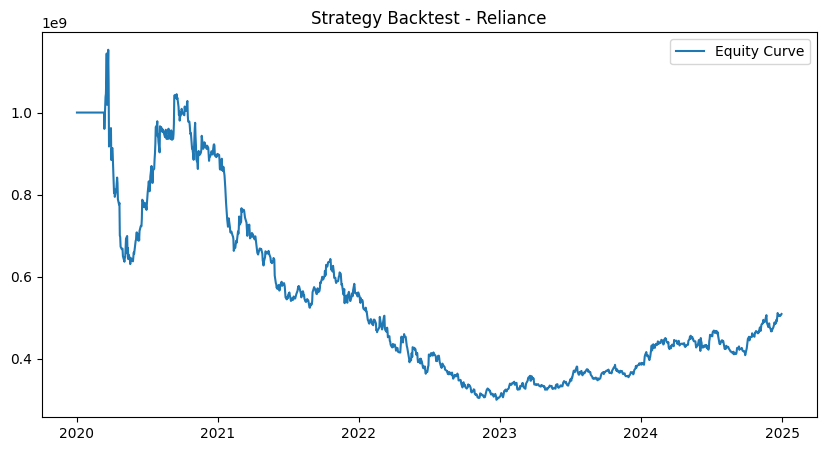

ROI: -49.096488333627114 %
Sharpe: -0.021407836585870175
Max Drawdown: -0.7397783834661551


In [14]:
import matplotlib.pyplot as plt

df = pd.read_csv("reliance.csv", parse_dates=["Date"], index_col="Date")
df = sma_strategy(df)
df = backtest(df)

plt.figure(figsize=(10,5))
plt.plot(df.index, df["Equity"], label="Equity Curve")
plt.title("Strategy Backtest - Reliance")
plt.legend()
plt.show()

print("ROI:", (df["Equity"].iloc[-1] - 1e9) / 1e9 * 100, "%")
print("Sharpe:", sharpe_ratio(df["Returns"]))
print("Max Drawdown:", max_drawdown(df["Equity"]))
